# Networks and their Structure: Network Science

## Modelling Networks continued

We look first at the simplest possible where edges are simply added at random.  To be precise: a *random graph* is defined by two numbers, the number of nodes and the probability that there is a link between each pair of distinct nodes. Below is the code for generating such graphs.

In [1]:
import random

def make_random_graph(num_nodes, prob):
    """Returns a dictionary to a random graph with the specified number of nodes
    and edge probability.  The nodes of the graph are numbered 0 to
    num_nodes - 1.  For every pair of nodes, i and j, the pair is considered
    twice: once to add an edge (i,j) with probability prob, and then to add an
    edge (j,i) with probability prob. 
    """
    #initialize empty graph
    random_graph = {}
    #consider each vertex
    for vertex in range(num_nodes):
        out_neighbours = []
        for neighbour in range(num_nodes):
            if vertex != neighbour:
                random_number = random.random()
                if random_number < prob:
                    out_neighbours += [neighbour]        
        #add vertex with list of out_neighbours
        random_graph[vertex] = set(out_neighbours)
    return random_graph

**Task**: create a random graph on 1000 vertices with prob=0.1 and plot the normalized in-degree distribution (using the code from the previous notebook --  if a logarithmic plot is not appropriate replace plt.loglog with plt.plot.

Compare with the previous plot.  Are random graphs a good model for citation networks?

**Solution**

We need the functions ``compute_in_degrees`` and ``in_degree_distribution`` from last time.  These have been saved in a notebook NatSfunctions.ipynb where we will put anything else useful we develop which can then be made available in other notebooks using

In [2]:
%run NatSfunctions.ipynb

Now create a random graph with the specified parameters and find the normalized (in-)degree distribution.  (As in-degree and out-degree are the same, we could more simply just look up the vertices and count the neighbours.)

In [3]:
example_random_graph = make_random_graph(1000, 0.1)

example_rg_distribution = in_degree_distribution(example_random_graph)

normalized_rg_distribution = {}
for degree in example_rg_distribution:
    normalized_rg_distribution[degree] = example_rg_distribution[degree] / 1000.0

And for ease of comparision, make a plot.

<function matplotlib.pyplot.show(*args, **kw)>

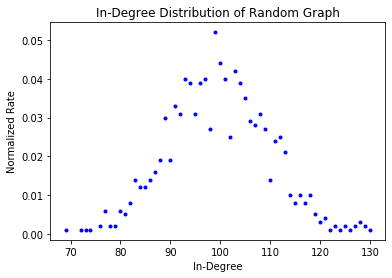

In [4]:
#create arrays for plotting
xdata = []
ydata = []
for degree in normalized_rg_distribution:
    xdata += [degree]
    ydata += [normalized_rg_distribution[degree]]
    
#plot degree distribution
plt.clf() #clears plot else will be superimposed
plt.xlabel('In-Degree')
plt.ylabel('Normalized Rate')
plt.title('In-Degree Distribution of Random Graph')
plt.plot(xdata, ydata, marker='.', linestyle='None', color='b')
plt.savefig('na2random.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.show